In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Cargar los datos
df = pd.read_csv('melb_data.csv')

In [3]:
# Análisis preliminar
print(df.head())
print(df.info())
print(df.describe())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

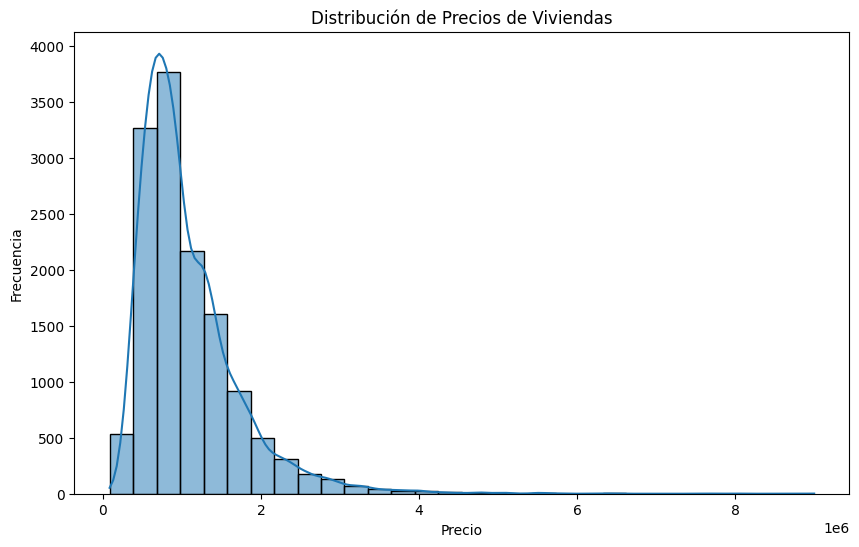

In [4]:
# Gráficos preliminares
# Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribución de Precios de Viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

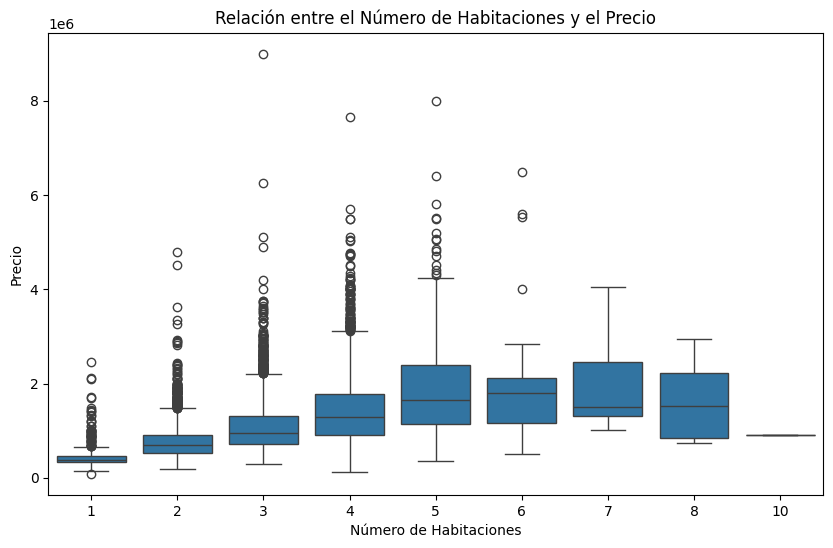

In [5]:
# Relación entre precio y número de habitaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=df)
plt.title('Relación entre el Número de Habitaciones y el Precio')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.show()

# 2. Selecciona los datos que te parezcan más apropiados para el modelado. Normaliza los datos de entrada


In [6]:
# Selección de características relevantes
selected_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Distance']
df_selected = df[selected_features + ['Price']].dropna()

In [8]:
# Normalización de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_selected[selected_features]
y = df_selected['Price']
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[-1.00692786 -0.8307085  -0.36242838 -0.71619544 -1.69609478 -1.27190345]
 [ 0.02436116  0.57042256 -0.3864603   0.0743187  -1.69609478 -1.27190345]
 [ 1.05565017 -0.8307085  -0.40175334 -0.01475332  1.31515346 -1.27190345]
 [ 0.02436116  0.57042256 -0.26520835  0.74235881 -1.43195019 -1.27190345]
 [-1.00692786 -0.8307085  -0.25319239 -0.40444339 -1.96023936 -1.27190345]]


# 3. Construye y entrena un modelo de ML usando scikit learn, utiliza

#     a) Regresión lineal simple y múltiple (LinearRegression)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("Linear Regression R^2:", r2_score(y_test, y_pred_linear))


Linear Regression MAE: 303246.5797425674
Linear Regression RMSE: 480484.18410819216
Linear Regression R^2: 0.4333599293041104


# b) Árboles de Decisión

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de árboles de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_tree))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("Decision Tree R^2:", r2_score(y_test, y_pred_tree))


Decision Tree MAE: 318870.9329446064
Decision Tree RMSE: 500834.29350220494
Decision Tree R^2: 0.3843452896612721


# c) Otro modelo (Random Forest)

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_forest = forest_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_forest))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))
print("Random Forest R^2:", r2_score(y_test, y_pred_forest))


Random Forest MAE: 228160.15983722062
Random Forest RMSE: 344885.31275213824
Random Forest R^2: 0.7080567157545818


# 4. Evalúa y compara cada uno de los modelos

               Model            MAE           RMSE       R^2
0  Linear Regression  303246.579743  480484.184108  0.433360
1      Decision Tree  318870.932945  500834.293502  0.384345
2      Random Forest  228160.159837  344885.312752  0.708057


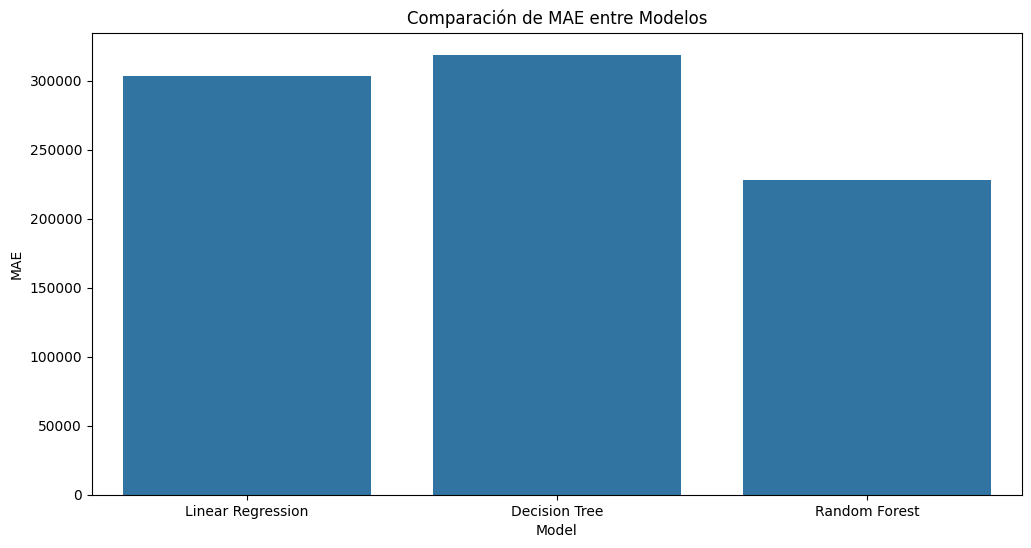

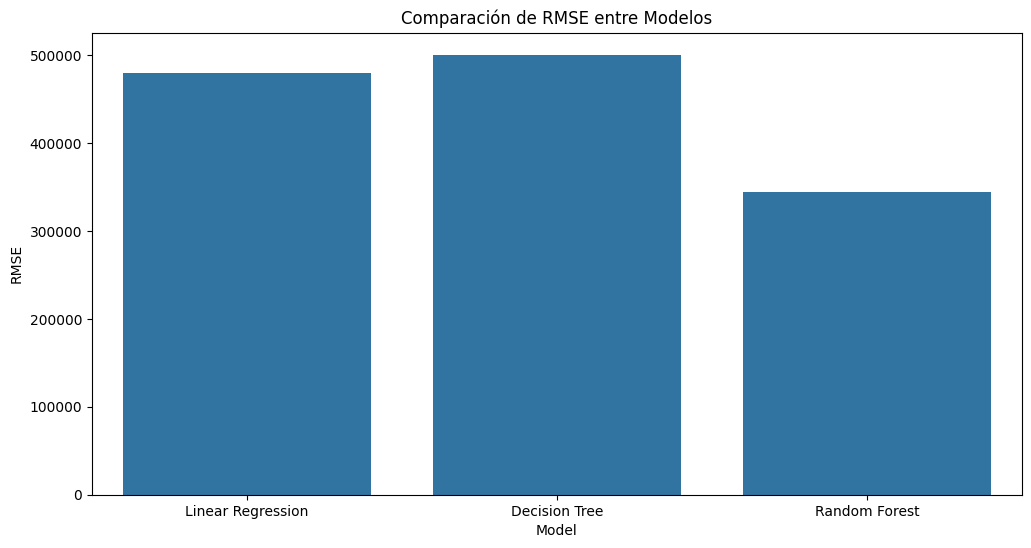

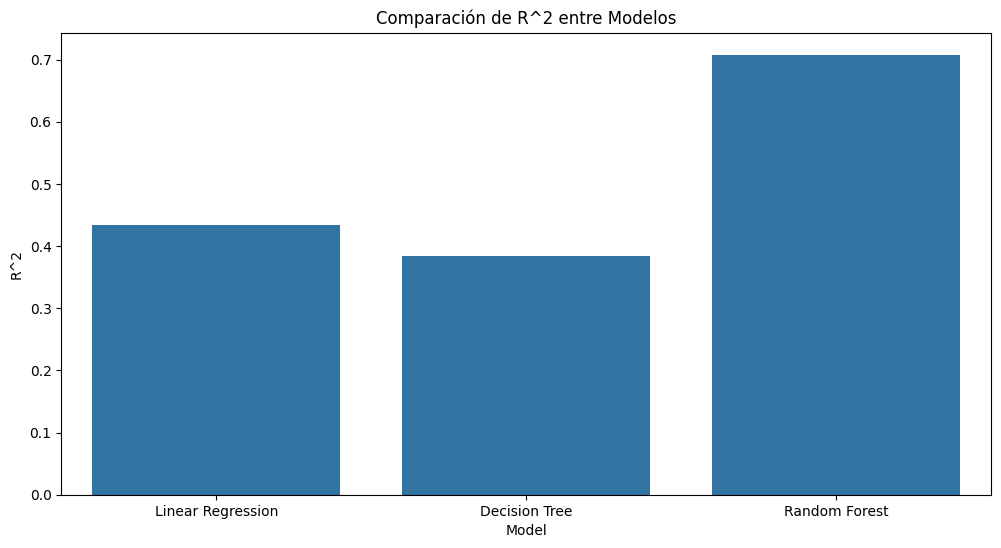

In [12]:
# Comparar los resultados
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_tree), mean_absolute_error(y_test, y_pred_forest)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_linear)), np.sqrt(mean_squared_error(y_test, y_pred_tree)), np.sqrt(mean_squared_error(y_test, y_pred_forest))],
    "R^2": [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_tree), r2_score(y_test, y_pred_forest)]
}

results_df = pd.DataFrame(results)
print(results_df)

# Gráficos de comparación
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Comparación de MAE entre Modelos')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Comparación de RMSE entre Modelos')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R^2', data=results_df)
plt.title('Comparación de R^2 entre Modelos')
plt.show()
